In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc

In [3]:
df = pd.read_csv("./breast-cancer.csv")
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.shape

(569, 32)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# EDA (Exploratory Data Analysis)

In [7]:
duplicate = df.duplicated()
print(duplicate.sum())

0


In [8]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
num_cols = df.select_dtypes(["float64","int64"])

In [10]:
def remove_outlier(col):
    Q1, Q3 = col.quantile([0.25, 0.75])  # Calculate the first and third quartiles
    IQR = Q3 - Q1                         # Calculate the Interquartile Range (IQR)
    lower_range = Q1 - (1.5 * IQR)        # Define the lower bound
    upper_range = Q3 + (1.5 * IQR)        # Define the upper bound
    return lower_range, upper_range


In [11]:
for i in num_cols.columns:
    lower_range,upper_range = remove_outlier(df[i])
    df[i] = np.where(df[i] > upper_range, upper_range, df[i])
    df[i] = np.where(df[i] < lower_range, lower_range, df[i])


#### Convert Categorical Data to Numerical 

In [12]:
le = LabelEncoder()
Label = ["diagnosis"]
for i in Label:
    df[i] = le.fit_transform(df[i])
    df.shape

In [13]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302.0,1,17.99,10.38,122.80,1001.0,0.118400,0.22862,0.28241,0.14710,...,25.38,17.33,184.60,1937.05,0.1622,0.62695,0.7119,0.2654,0.41915,0.11890
1,842517.0,1,20.57,17.77,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1937.05,0.1238,0.18660,0.2416,0.1860,0.27500,0.08902
2,20728995.5,1,19.69,21.25,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.00,0.1444,0.42450,0.4504,0.2430,0.36130,0.08758
3,20728995.5,1,11.42,20.38,77.58,386.1,0.133695,0.22862,0.24140,0.10520,...,14.91,26.50,98.87,567.70,0.1901,0.62695,0.6869,0.2575,0.41915,0.12301
4,20728995.5,1,20.29,14.34,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.00,0.1374,0.20500,0.4000,0.1625,0.23640,0.07678


In [14]:
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

#### Bivariate Analysis 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    float64
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [16]:
def plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    sns.distplot(df[variable], kde=True, bins=10)
    plt.title(variable)
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=pylab)
    plt.title(variable)
    plt.show()
    for i in df.columns:
        plots(df, i)


## Feature Engineering

In [17]:
X = df.iloc[:,2:]
Y = df["diagnosis"]

In [18]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.118400,0.22862,0.28241,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,1937.05,0.1622,0.62695,0.7119,0.2654,0.41915,0.11890
1,20.57,17.77,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1937.05,0.1238,0.18660,0.2416,0.1860,0.27500,0.08902
2,19.69,21.25,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.00,0.1444,0.42450,0.4504,0.2430,0.36130,0.08758
3,11.42,20.38,77.58,386.1,0.133695,0.22862,0.24140,0.10520,0.2464,0.07875,...,14.91,26.50,98.87,567.70,0.1901,0.62695,0.6869,0.2575,0.41915,0.12301
4,20.29,14.34,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.00,0.1374,0.20500,0.4000,0.1625,0.23640,0.07678


In [19]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [20]:
mi_score = mutual_info_classif(X,Y)
mi_score = pd.Series(mi_score)
mi_score.index = X.columns
mi_score.sort_values(ascending=True)

texture_se                 0.000000
fractal_dimension_mean     0.000000
symmetry_se                0.004551
smoothness_se              0.011632
fractal_dimension_se       0.036926
fractal_dimension_worst    0.066176
symmetry_mean              0.068220
compactness_se             0.076434
smoothness_mean            0.079996
symmetry_worst             0.089984
texture_mean               0.098374
smoothness_worst           0.098907
concavity_se               0.116458
texture_worst              0.124064
concave points_se          0.126286
compactness_mean           0.213278
compactness_worst          0.226188
radius_se                  0.248559
perimeter_se               0.278100
concavity_worst            0.318382
area_se                    0.340141
area_mean                  0.360473
radius_mean                0.367239
concavity_mean             0.373397
perimeter_mean             0.404950
concave points_worst       0.436619
concave points_mean        0.439011
radius_worst               0

<Axes: >

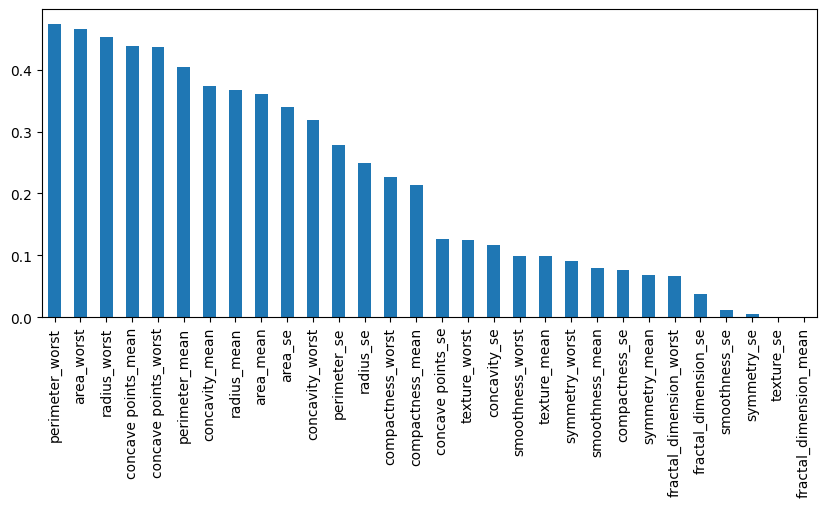

In [21]:
mi_score.sort_values(ascending=False).plot.bar(figsize=(10, 4))

# PCA降维

In [22]:
# 标准化
sc = StandardScaler()
X_data_sc = sc.fit_transform(X)

In [23]:
# PCA降维
pc = PCA()
X_data_sc_pc = pc.fit_transform(X_data_sc)
explained_variance = pc.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

Explained Variance Ratios: [4.68661841e-01 1.87554026e-01 9.15954529e-02 6.33646981e-02
 5.32822387e-02 3.85550667e-02 1.99927196e-02 1.44884010e-02
 1.16375261e-02 9.81443371e-03 9.14050130e-03 7.35162620e-03
 5.60460662e-03 4.92329028e-03 3.16824880e-03 2.06234510e-03
 1.49872459e-03 1.29315094e-03 1.24695669e-03 9.97630848e-04
 9.01090320e-04 7.22058498e-04 6.20386398e-04 4.59774047e-04
 4.27718134e-04 2.69751238e-04 2.43495917e-04 7.82488013e-05
 3.59612150e-05 8.02978369e-06]


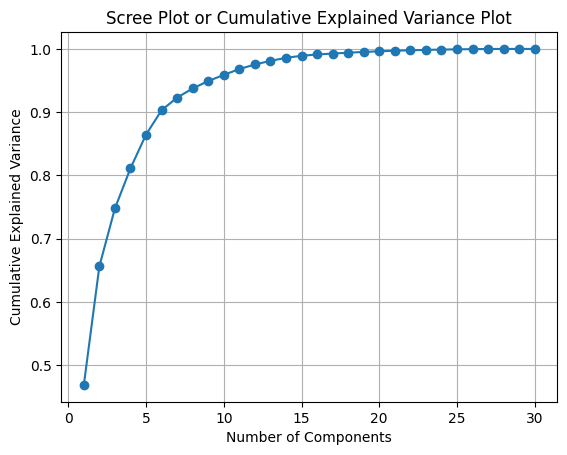

In [24]:
# calculate cumulative sum of explained variance ratio
cumulative_variance = np.cumsum(explained_variance)
# plot the scree plot or cumulative explained variance plot
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance,marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot or Cumulative Explained Variance Plot')
plt.grid(True)
plt.show()


In [25]:
# Cumulative explained variance nikalen
cumulative_variance = np.cumsum(explained_variance)
# Kitne components select karna hai, yeh decide karen
desired_variance = 0.95 # Example: 95% variance ko capture karna hai
# Kitne components select kiye ja sakte hain
num_components = np.argmax(cumulative_variance >= desired_variance) + 1
print(f"\nNumber of components selected: {num_components}")



Number of components selected: 10


In [26]:
pc = PCA(n_components=10)
X_data_sc = pc.fit_transform(X_data_sc)

In [27]:
explained_variance = pc.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

Explained Variance Ratios: [0.46866184 0.18755403 0.09159545 0.0633647  0.05328224 0.03855507
 0.01999272 0.0144884  0.01163753 0.00981443]


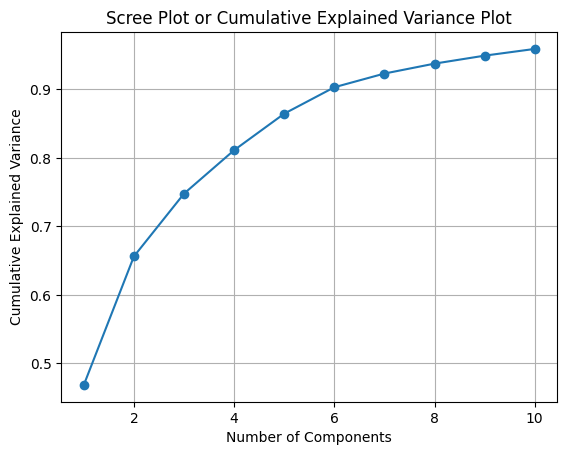

In [28]:
# calculate cumulative sum of explained variance ratio
cumulative_variance = np.cumsum(explained_variance)
# plot the scree plot or cumulative explained variance plot
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance,marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot or Cumulative Explained Variance Plot')
plt.grid(True)
plt.show()


# Spliting Data into Train and Test

In [29]:
train_data_sc,test_data_sc,train_label,test_label = train_test_split(X_data_sc, Y,test_size=0.3, random_state=0)

In [30]:
print("train_data : ",train_data_sc.shape)
print("train_label : ",train_label.shape)
print("test_data : ",test_data_sc.shape)
print("test_label : ",test_label.shape)


train_data :  (398, 10)
train_label :  (398,)
test_data :  (171, 10)
test_label :  (171,)


In [31]:
train_data_sc.shape

(398, 10)

In [32]:
# 0: Benign良性
# 1: Malignant惡性
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

##  Model

In [33]:
accuracy_results = {}

Accuracy Score :  0.9590643274853801
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       105
           1       0.97      0.92      0.95        66

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



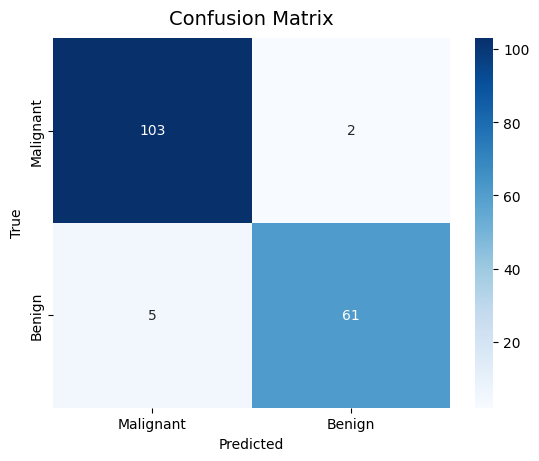

In [34]:
# Logistic regression model
model_lr = LogisticRegression().fit(train_data_sc,train_label)
y_pred = model_lr.predict(test_data_sc)
print("Accuracy Score : ",accuracy_score(y_pred,test_label))
print(classification_report(y_pred,test_label))
cm = confusion_matrix(y_pred,test_label)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=['Malignant','Benign'],yticklabels=['Malignant','Benign'])
plt.title('Confusion Matrix', fontsize=14, pad=10)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [35]:
train_accuracy_lr = cross_val_score(model_lr,train_data_sc,train_label,cv=5).mean()
test_accuracy_lr = cross_val_score(model_lr,test_data_sc,test_label,cv=5).mean()
print(" Train Data Cross_val_score : ",train_accuracy_lr)
print("Test Data Cross_val_score : ",test_accuracy_lr)

 Train Data Cross_val_score :  0.9749050632911394
Test Data Cross_val_score :  0.976638655462185


In [36]:
accuracy_results["LR"] = train_accuracy_lr

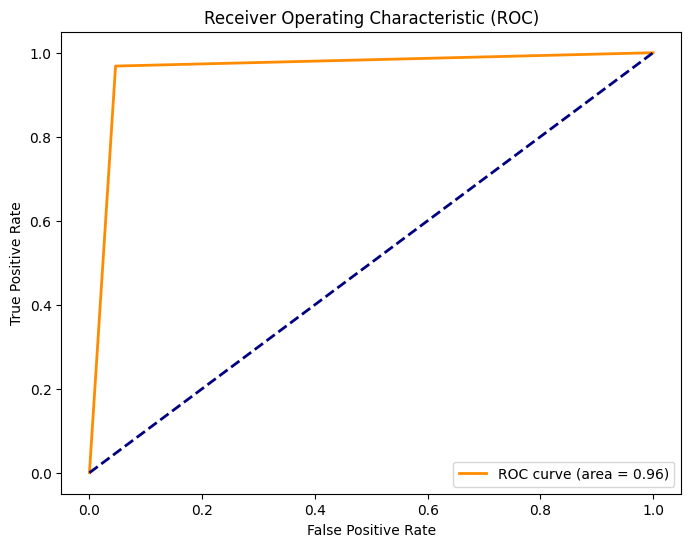

In [37]:
fpr, tpr, thresholds = roc_curve(test_label, y_pred)
# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


### Random Forest Model

Accuracy Score :  0.9005847953216374
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       105
           1       0.89      0.85      0.87        66

    accuracy                           0.90       171
   macro avg       0.90      0.89      0.89       171
weighted avg       0.90      0.90      0.90       171



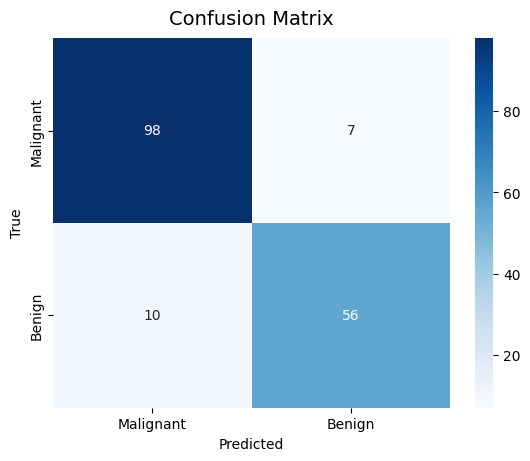

In [38]:
# Random Forest Model
model_rf = RandomForestClassifier(max_depth=5, min_samples_leaf=1,min_samples_split=5, n_estimators=200).fit(train_data_sc,train_label)
y_pred_2 = model_rf.predict(test_data_sc)
print("Accuracy Score : ",accuracy_score(y_pred_2,test_label))
print(classification_report(y_pred_2,test_label))
cm2 = confusion_matrix(y_pred_2, test_label)

sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues',xticklabels=['Malignant','Benign'],yticklabels=['Malignant','Benign'])
plt.title('Confusion Matrix', fontsize=14, pad=10)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [39]:
train_accuracy_rf = cross_val_score(model_rf,train_data_sc,train_label,cv=5).mean()
test_accuracy_rf = cross_val_score(model_rf,test_data_sc,test_label,cv=5).mean()
print(" Train Data Cross_val_score : ",train_accuracy_rf)
print("Test Data Cross_val_score : ",test_accuracy_rf)


 Train Data Cross_val_score :  0.9422784810126581
Test Data Cross_val_score :  0.9181512605042016


In [40]:
accuracy_results["RL"] = train_accuracy_rf

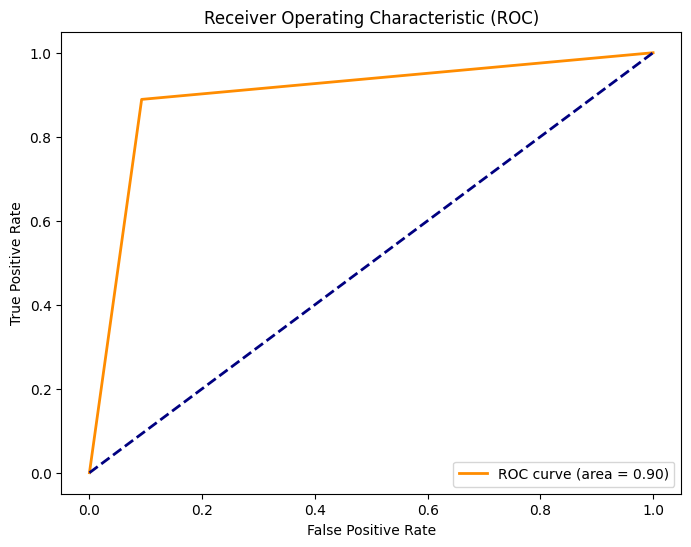

In [41]:
fpr, tpr, thresholds = roc_curve(test_label, y_pred_2)
# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [42]:
from sklearn.model_selection import GridSearchCV
# Define the hyperparameter grid
param_grid = {
'n_estimators': [50, 100, 200],
'max_depth': [5, 10, 15],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4]
}
# Create a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
# Create Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5,scoring='accuracy', n_jobs=-1)
# Fit the Grid Search to the data
grid_search.fit(train_data_sc, train_label)
# Print the best parameters
print("Best Parameters:", grid_search.best_params_)
# Print the best score
print("Best Score:", grid_search.best_score_)
# Get the best model
best_rf_model = grid_search.best_estimator_


Best Parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.9523417721518987


### Decision Tree Model

Accuracy Score :  0.9239766081871345
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       107
           1       0.90      0.89      0.90        64

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171



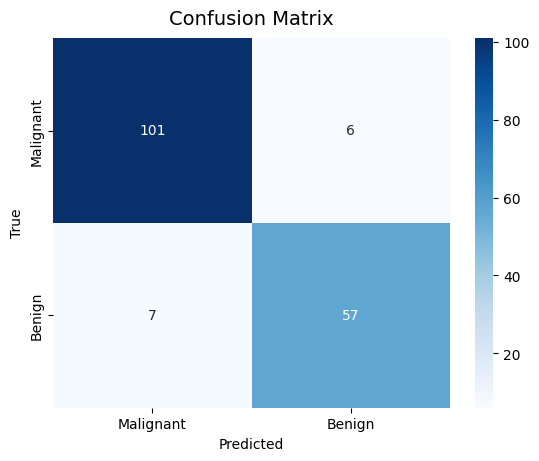

In [43]:
# Decision Tree Model
model_tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=4,min_samples_split=2).fit(train_data_sc,train_label)
y_pred_3 = model_tree.predict(test_data_sc)
print("Accuracy Score : ",accuracy_score(y_pred_3,test_label))
print(classification_report(y_pred_3,test_label))
cm3 = confusion_matrix(y_pred_3,test_label)

sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues',xticklabels=['Malignant','Benign'],yticklabels=['Malignant','Benign'])
plt.title('Confusion Matrix', fontsize=14, pad=10)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [44]:
train_accuracy_tree =cross_val_score(model_tree,train_data_sc,train_label,cv=5).mean()
test_accuracy_tree = cross_val_score(model_tree,test_data_sc,test_label,cv=5).mean()
print(" Train Data Cross_val_score : ",train_accuracy_tree)
print("Test Data Cross_val_score : ",test_accuracy_tree)


 Train Data Cross_val_score :  0.9171202531645569
Test Data Cross_val_score :  0.8714285714285713


In [45]:
accuracy_results["Decision_Tree"] = train_accuracy_tree

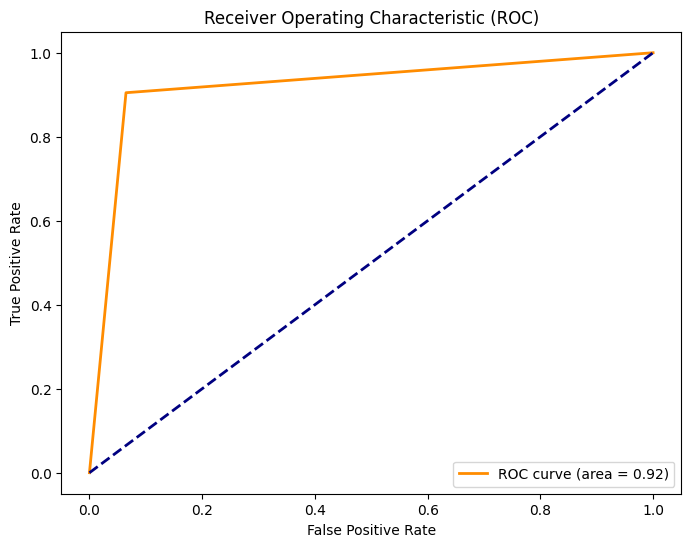

In [46]:
fpr, tpr, thresholds = roc_curve(test_label, y_pred_3)
# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [47]:
from sklearn.model_selection import GridSearchCV
# Define the hyperparameter grid
param_grid = {
'max_depth': [5, 10, 15],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4]
}
# Create a Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
# Create Grid Search
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5,scoring='accuracy', n_jobs=-1)
# Fit the Grid Search to the data
grid_search.fit(train_data_sc, train_label)
# Print the best parameters
print("Best Parameters:", grid_search.best_params_)
# Print the best score
print("Best Score:", grid_search.best_score_)
# Get the best model
best_dt_model = grid_search.best_estimator_


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Score: 0.919620253164557


###   KNN Model

Accuracy Score :  0.9590643274853801
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       109
           1       0.94      0.95      0.94        62

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



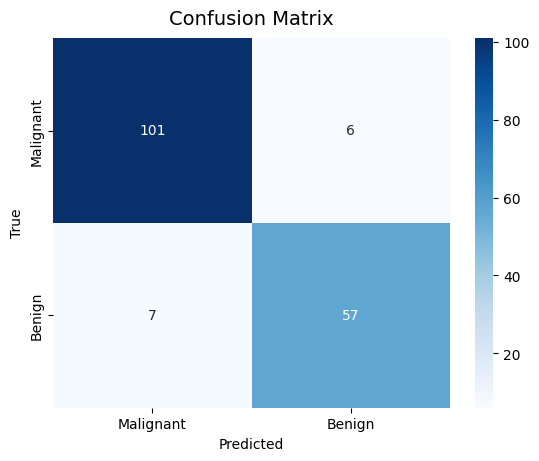

In [48]:
# KNN Model
model_knn = KNeighborsClassifier().fit(train_data_sc,train_label)
y_pred_4 = model_knn.predict(test_data_sc)
print("Accuracy Score : ",accuracy_score(y_pred_4,test_label))
print(classification_report(y_pred_4,test_label))
cm4 = confusion_matrix(y_pred_4,test_label)

sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues',xticklabels=['Malignant','Benign'],yticklabels=['Malignant','Benign'])
plt.title('Confusion Matrix', fontsize=14, pad=10)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [49]:
train_accuracy_knn = cross_val_score(model_knn,train_data_sc,train_label,cv=5).mean()
test_accuracy_knn = cross_val_score(model_knn,test_data_sc,test_label,cv=5).mean()
print(" Train Data Cross_val_score : ",train_accuracy_knn)
print("Test Data Cross_val_score : ",test_accuracy_knn)


 Train Data Cross_val_score :  0.9522784810126581
Test Data Cross_val_score :  0.9354621848739495


In [50]:
accuracy_results["KNN"] = train_accuracy_knn

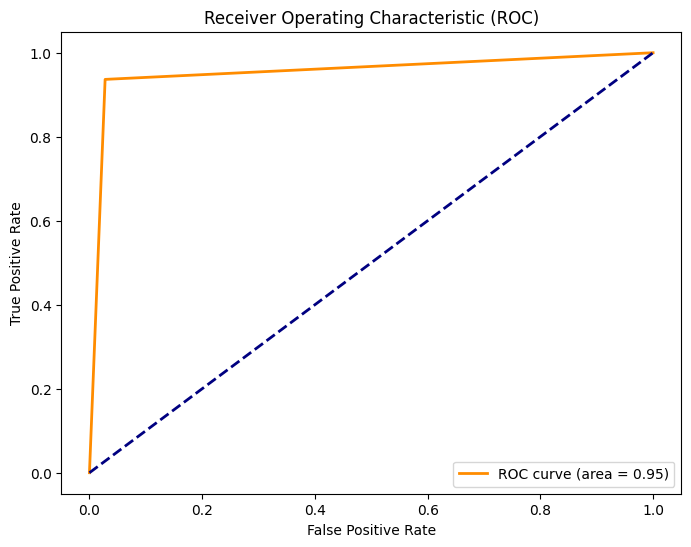

In [51]:
fpr, tpr, thresholds = roc_curve(test_label, y_pred_4)
# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

### XGBoost Model

Accuracy Score :  0.9532163742690059
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       108
           1       0.94      0.94      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



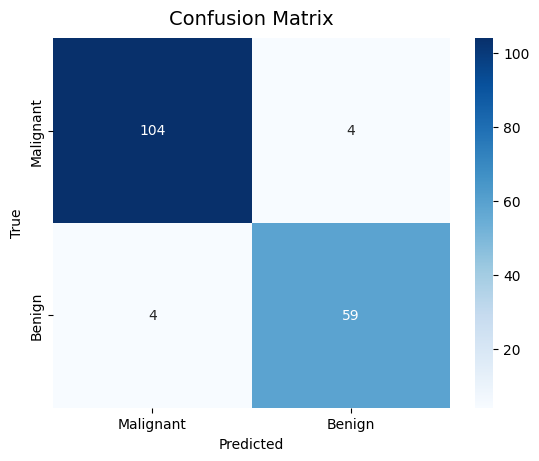

In [52]:
# XGBoost Model
model_xgb = xgb.XGBClassifier().fit(train_data_sc,train_label)
y_pred_5 = model_xgb.predict(test_data_sc)
print("Accuracy Score : ",accuracy_score(y_pred_5,test_label))
cm5 = confusion_matrix(y_pred_5,test_label)
print(classification_report(y_pred_5,test_label))
sns.heatmap(cm5, annot=True, fmt='d', cmap='Blues',xticklabels=['Malignant','Benign'],yticklabels=['Malignant','Benign'])
plt.title('Confusion Matrix', fontsize=14, pad=10)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [53]:
train_accuracy_xgb = cross_val_score(model_xgb,train_data_sc,train_label,cv=5).mean()
test_accuracy_xgb = cross_val_score(model_xgb,test_data_sc,test_label,cv=5).mean()
print(" Train Data Cross_val_score : ",train_accuracy_xgb)
print("Test Data Cross_val_score : ",test_accuracy_xgb)

 Train Data Cross_val_score :  0.954778481012658
Test Data Cross_val_score :  0.9356302521008404


In [54]:
accuracy_results["XGBoost"] = train_accuracy_xgb

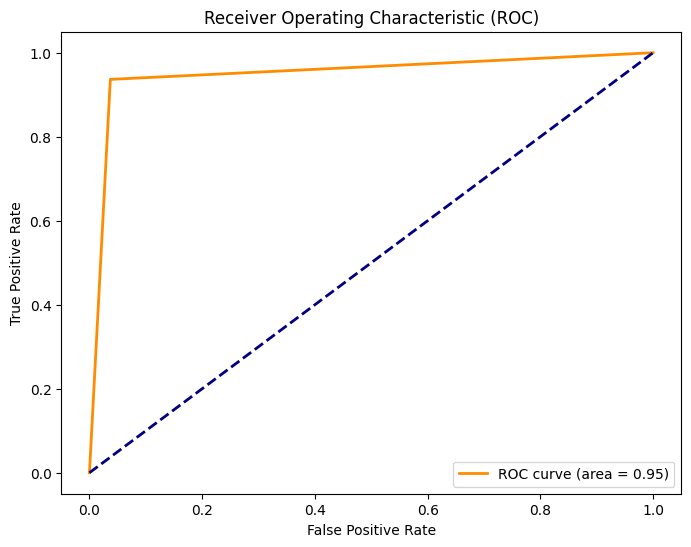

In [55]:
fpr, tpr, thresholds = roc_curve(test_label, y_pred_5)
# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

### SVC Model


Accuracy Score :  0.9766081871345029
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



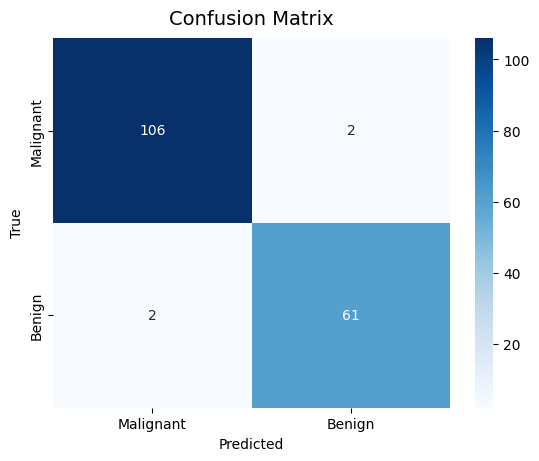

In [56]:
# SWM Model
model_svc = SVC().fit(train_data_sc,train_label)
y_pred_6 = model_svc.predict(test_data_sc)
print("Accuracy Score : ",accuracy_score(y_pred_6,test_label))
print(classification_report(y_pred_6,test_label))
cm6 = confusion_matrix(y_pred_6,test_label)

sns.heatmap(cm6, annot=True, fmt='d', cmap='Blues',xticklabels=['Malignant','Benign'],yticklabels=['Malignant','Benign'])
plt.title('Confusion Matrix', fontsize=14, pad=10)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [57]:
train_accuracy_svc = cross_val_score(model_svc,train_data_sc,train_label,cv=5).mean()
test_accuracy_svc = cross_val_score(model_svc,test_data_sc,test_label,cv=5).mean()
print(" Train Data Cross_val_score : ",train_accuracy_svc)
print("Test Data Cross_val_score : ",test_accuracy_svc)


 Train Data Cross_val_score :  0.9724050632911393
Test Data Cross_val_score :  0.9588235294117646


In [58]:
accuracy_results["SVM"] = train_accuracy_svc

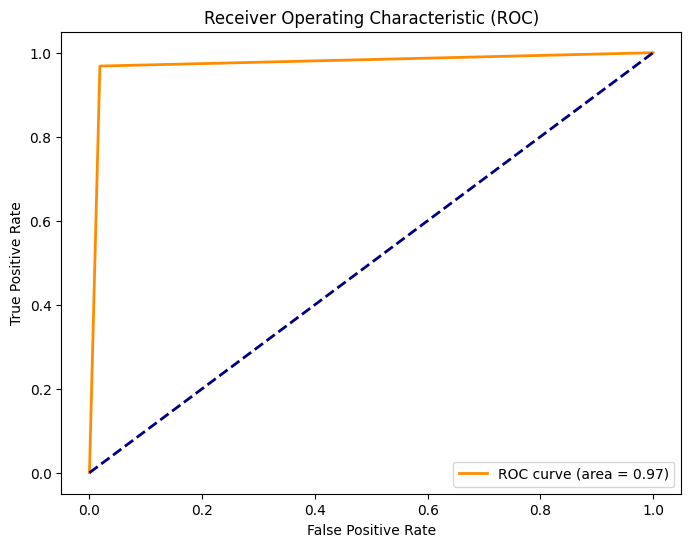

In [59]:
fpr, tpr, thresholds = roc_curve(test_label, y_pred_6)
# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

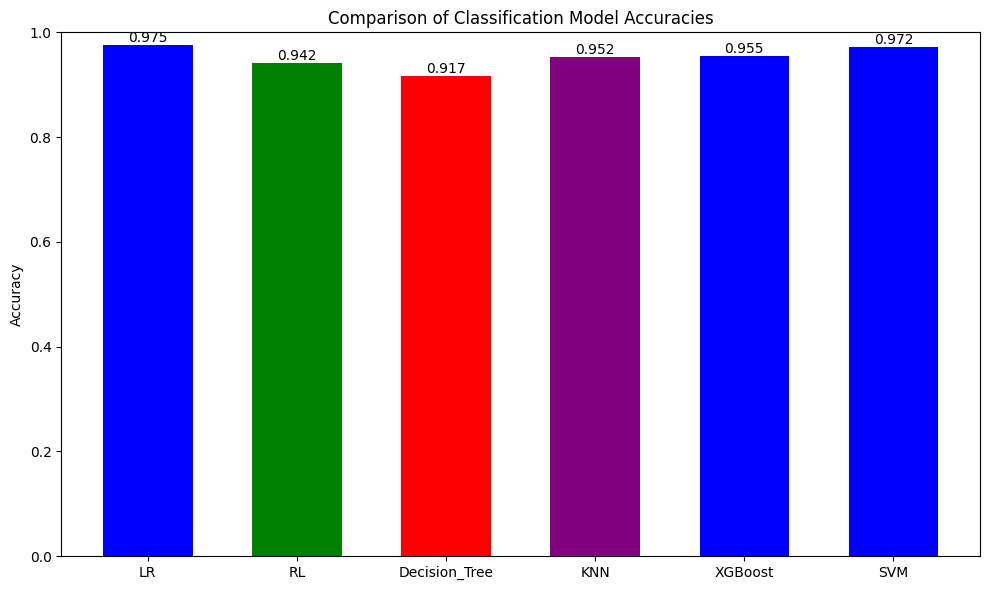

In [60]:
# Plotting the accuracy results
model_names = list(accuracy_results.keys())
accuracy_values = list(accuracy_results.values())

# Plotting the accuracy results using a different style
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_values, color=['blue', 'green', 'red', 'purple', 'blue'],width=0.6)  # 减小width值使柱形变瘦，默认是0.8
plt.ylabel('Accuracy')
plt.title('Comparison of Classification Model Accuracies')
plt.ylim(0, 1)

# 添加准确率标签到柱状图顶部
for i, v in enumerate(accuracy_values):
    plt.text(i, v, f'{v:.3f}', 
             ha='center',
             va='bottom',
             color='black',
             fontsize=10)

# 增加x轴两侧的留白
# plt.margins(x=0.2)  # 增加横向留白
# 旋转x轴标签
# plt.xticks(rotation=45, ha='right')  # 添加这行来旋转标签

plt.tight_layout()  # 调整布局，防止标签被切割
plt.show()

# 五交叉验证

Cross-validation results:
               precision  recall     f1  accuracy
LR                 0.976   0.963  0.969     0.977
SVM                0.981   0.953  0.966     0.975
RF                 0.931   0.915  0.922     0.942
KNN                0.972   0.934  0.952     0.965
Decision Tree      0.886   0.868  0.875     0.907
XGBoost            0.944   0.944  0.944     0.958


<Figure size 2400x600 with 0 Axes>

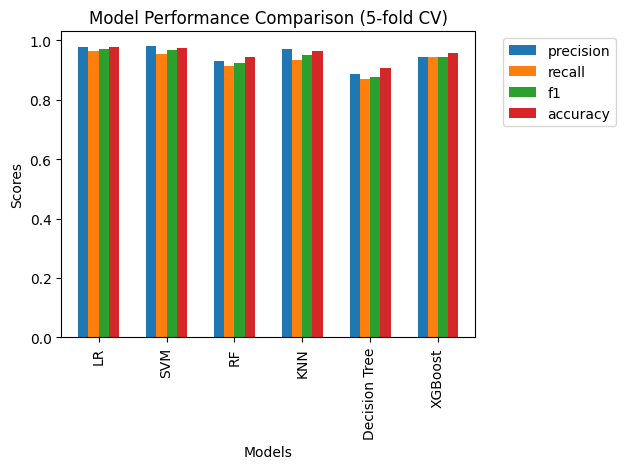

In [61]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score

# 定义评估指标
scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'accuracy': make_scorer(accuracy_score)
}

# 创建模型字典
models = {
    'LR': LogisticRegression(),
    'SVM': SVC(),
    'RF': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': xgb.XGBClassifier()
}

# 存储结果的字典
results = {}

# 对每个模型进行交叉验证
for name, model in models.items():
    # 进行5折交叉验证
    scores = cross_validate(model, X_data_sc,Y, scoring=scoring,  cv=5)
    # 计算平均分数
    results[name] = {
        'precision': scores['test_precision'].mean(),
        'recall': scores['test_recall'].mean(),
        'f1': scores['test_f1'].mean(),
        'accuracy': scores['test_accuracy'].mean()
    }

# 创建结果DataFrame
df_results = pd.DataFrame(results).T
df_results = df_results.round(3)  # 保留3位小数

# 显示结果
print("Cross-validation results:")
print(df_results)

# 可选：保存到CSV
df_results.to_csv('./model_comparison_cv.csv')

# 可视化结果
plt.figure(figsize=(24, 6))
df_results.plot(kind='bar', width=0.6)
plt.title('Model Performance Comparison (5-fold CV)')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

In [62]:
df_results

,precision,recall,f1,accuracy
LR,0.976,0.963,0.969,0.977
SVM,0.981,0.953,0.966,0.975
RF,0.931,0.915,0.922,0.942
KNN,0.972,0.934,0.952,0.965
Decision Tree,0.886,0.868,0.875,0.907
XGBoost,0.944,0.944,0.944,0.958


In [63]:
df_results['accuracy']

LR               0.977
SVM              0.975
RF               0.942
KNN              0.965
Decision Tree    0.907
XGBoost          0.958
Name: accuracy, dtype: float64

In [64]:
df_results['accuracy'].keys()

Index(['LR', 'SVM', 'RF', 'KNN', 'Decision Tree', 'XGBoost'], dtype='object')

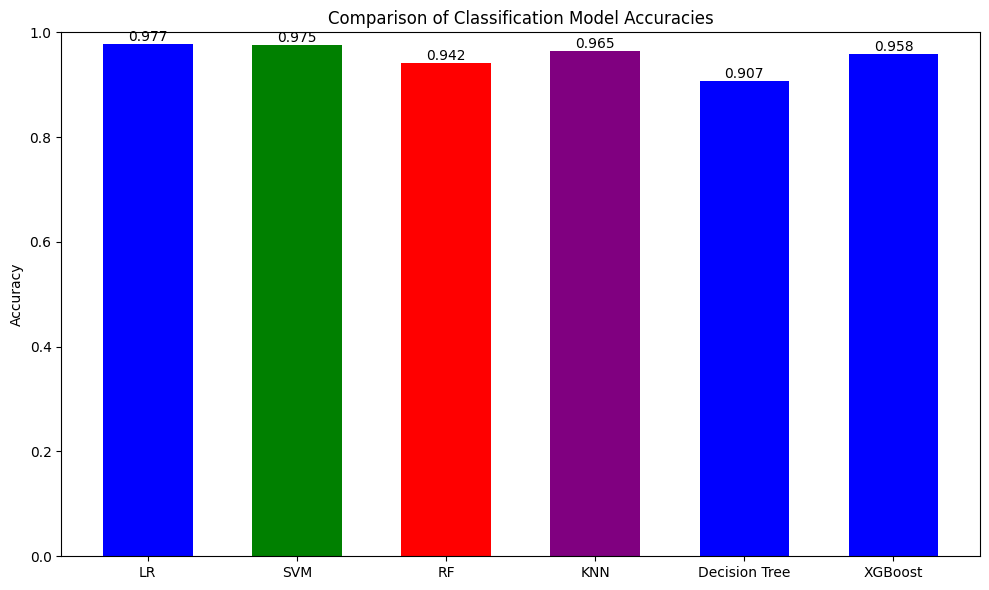

In [65]:
# Plotting the accuracy results
model_names = list(df_results['accuracy'].keys())
accuracy_values = list(df_results['accuracy'])

# Plotting the accuracy results using a different style
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_values, color=['blue', 'green', 'red', 'purple', 'blue'],width=0.6)  # 减小width值使柱形变瘦，默认是0.8
plt.ylabel('Accuracy')
plt.title('Comparison of Classification Model Accuracies')
plt.ylim(0, 1)

# 添加准确率标签到柱状图顶部
for i, v in enumerate(accuracy_values):
    plt.text(i, v, f'{v:.3f}', 
             ha='center',
             va='bottom',
             color='black',
             fontsize=10)

# 增加x轴两侧的留白
# plt.margins(x=0.2)  # 增加横向留白
# 旋转x轴标签
# plt.xticks(rotation=45, ha='right')  # 添加这行来旋转标签

plt.tight_layout()  # 调整布局，防止标签被切割
plt.show()